# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Question

> How can a US insurance company determine the top 10 cities where its clients have the highest annual income for persons aged 40 and below? 

### b) Defining the Metric for Success

The metric for success of the project is measured when we get to remove the outliers and deduce the top ten cities the highest annual income

### c) Understanding the context 

The context of the study focuses on the overall income for different cities across the globe

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/MedicalCitiesIncomeDataset

# let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# let's read the data
df = pd.read_csv('toy_dataset.csv')

# let's check the data
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## 3. Checking the Data

In [2]:
# let's check the no. of records in our dataset
df.shape

(150000, 6)

In [3]:
# let's check the top 5 records
df.head(5)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
# let's check the bottom 5 records
df.tail(5)

,Number,City,Gender,Age,Income,Illness
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No
149999,150000,Austin,Female,37,87251.0,No


In [5]:
# let's check the datatype of each column
df.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

<AxesSubplot:>

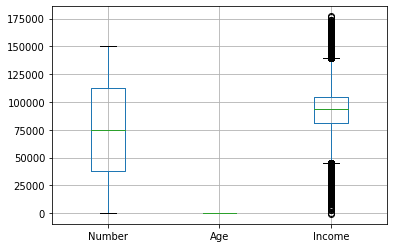

In [6]:
# Checking for Outliers
#
# let's check the outliers in the dataset
df.head()

df.boxplot()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


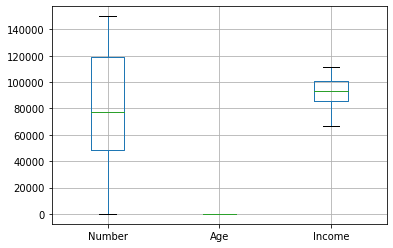

In [46]:
# Dealing with the Missing Data 
# percentile based outlier removal

# df.boxplot()
df.describe()

# minimum and maximum values
min_threshhold, max_threshhold = df.Income.quantile([0.15, 0.85])
min_threshhold, max_threshhold

# places where the income is less than 1%
df[df.Income < min_threshhold].head()

# places where the income is greater than 99%
df[df.Income > max_threshhold].head()

# creating a new dataframe with the outliers removed
df2 = df[(df.Income >= min_threshhold) & (df.Income <= max_threshhold)]
df2.shape
df2.boxplot()
df.describe()

In [7]:
# Checking for Anomalies
#
# let's check for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Length: 150000, dtype: bool

In [8]:
# let's check the missing data in the dataset
df.isnull().values.any()

False

In [10]:
# More data cleaning procedures
#
# let's drop the numbers column from the dataset
df2.drop('Number', axis=1, inplace=True)

/var/folders/rh/hyhcn5f12jqd6_4fz9f24wg80000gn/T/ipykernel_6732/2301813526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Number', axis=1, inplace=True)


## 6. Exploratory Analysis

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

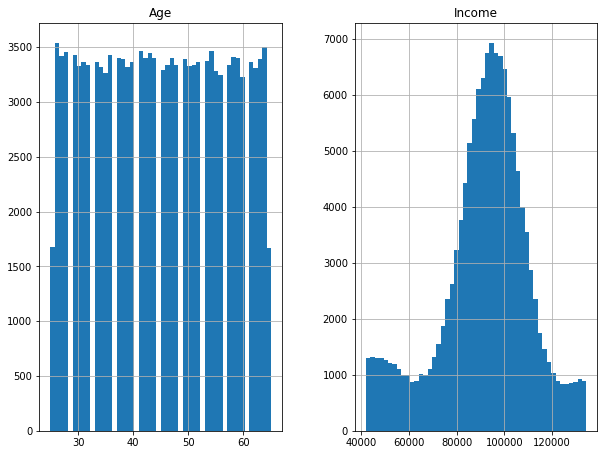

In [11]:
# Ploting the univariate summaries and recording our observations
# let's plot the univariate summaries
df2.hist(bins=50, figsize=(10, 7.5))

<AxesSubplot:title={'center':'Freq dist of Gender'}>

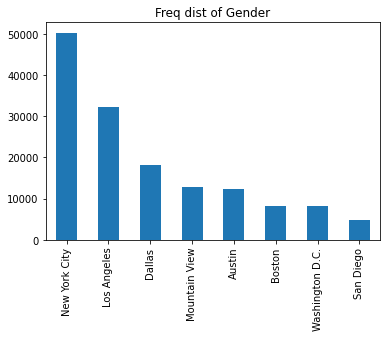

In [23]:

df2['City'].value_counts().plot.bar(title='Freq dist of Gender')

## 7. Implementing the Solution

In [30]:
# Implementing the Solution
# let's exclude ages above 40 from the dataset
df3 = df2[df2.Age <= 40]

# let's print the top 10 cities with the highest income
df3.groupby('City').Income.max().nlargest(10)

City
Mountain View      149023.0
Los Angeles        141249.0
San Diego          138208.0
New York City      134900.0
Boston             131988.0
Austin             126959.0
Washington D.C.    105912.0
Dallas              86500.0
Name: Income, dtype: float64

<AxesSubplot:title={'center':'Top 10 Cities with Highest Income'}, xlabel='City'>

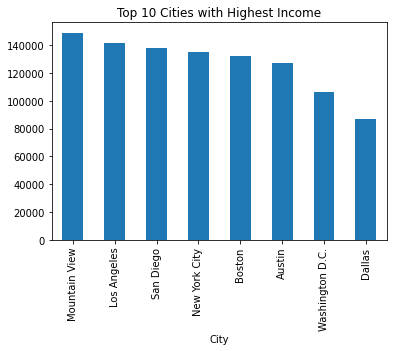

In [26]:

# let's plot the cities with the highest income
df3.groupby('City').Income.max().nlargest(10).plot.bar(title='Top 10 Cities with Highest Income')

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [20]:
# Reviewing the Solution 
# 

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

# b). Do we need other data to answer our question?

### c). Did we have the right question?